In [15]:
import pandas as pd
import re
import aacdata
import numpy as np
import matplotlib.pyplot as plt
import warnings

# parse_gender (use regex to see if Male or Female is in the string and return that, ele return string)
# find_duplicate_animals(df)
# remove_duplicate_animals(df)

# 107,050 Aniaml IDs but only 95,962 unique. Means dupes.
# 5 intake tpyes with Stray being top
# 8 intake conditions with Normal being top
# 5 animal types with Dog being type
# 49 different animal ages with 1 year being top

In [11]:
# Import cleaned data
df_intake = pd.read_csv('df_intake.csv')
df_outcome = pd.read_csv('df_outcome.csv')
df_combined = pd.read_csv('df_combined.csv')
df_combined_nodup = aacdata.remove_duplicate_animals(df_combined)

In [3]:
# Find the unique number of dog breeds in the combined data. Only looking at the top x number of value counts.
# This will dynamically update to top number of dog breeds analyzed and update the charts.
i = 5

print(f"Number of Unique Breeds (Combined): " + str(len(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent = round(df_combined[df_combined['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined): " + str(top_percent) + "%")

Number of Unique Breeds (Combined): 2166
Percent of Total of Top 5 Breeds (Combined): 41.0%


In [4]:
# Remove "Mix" from Breed Names. Duplicates Removed.

stop_words = ["Mix"]
f = lambda x: ' '.join(w for w in x.split() if not w in stop_words)

df_combined_nodup['Breed'] = df_combined_nodup['Breed'].apply(f)

print(f"Number of Unique Breeds (Combined, Cleaned, No Duplicates): " + str(len(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].unique())))
top_percent_nodup = round(df_combined_nodup[df_combined_nodup['Animal Type'] == 'Dog']['Breed'].value_counts(1).head(i).sum(),2)*100
print(f"Percent of Total of Top {i} Breeds (Combined, Cleaned, No Duplicates): " + str(top_percent_nodup) + "%")

Number of Unique Breeds (Combined, Cleaned, No Duplicates): 1851
Percent of Total of Top 5 Breeds (Combined, Cleaned, No Duplicates): 43.0%


### Top 5 Dog Breeds Brought to Center

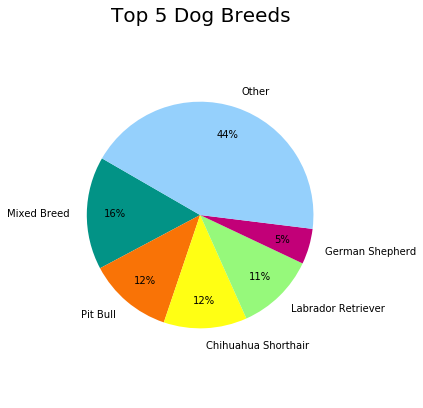

In [5]:
# Narrow dataframe to just dogs
dog_combined_nodup = df_combined_nodup.loc[df_combined_nodup['Animal Type'] == 'Dog']

# Parse dogs misted as mixed breeds into one category
def parse_breed(s):
    if bool(re.search('/', s)):
        return 'Mixed Breed'
    else:
        return s

dog_top_parse = dog_combined_nodup['Breed'].apply(parse_breed).value_counts().head(i)
dog_total = len(dog_combined_nodup)
other_dogs = dog_total - dog_top_parse.sum()
other_dogs = pd.Series([other_dogs], index=['Other'])

dog_total_series = dog_top_parse.append(other_dogs)

# Plot the Pie Chart
color = ['xkcd:teal', 'xkcd:orange', 'xkcd:yellow','xkcd:light green', 'xkcd:magenta', 'xkcd:light blue']
fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot(111)
ax.pie(dog_total_series.values, labels=dog_total_series.index, colors=color, autopct='%1.0f%%', labeldistance=1.15, pctdistance=0.75, startangle=150)
ax.set_title(f"Top {i} Dog Breeds", fontsize=20);
plt.axis('equal')
# plt.figtext(0, 0, '*Include a description of other here.', style='italic') 
plt.tight_layout()
plt.savefig("Images/Top_5_Dog_Breeds.png")

### Does breed have any correlation to intake reason, adoption rate, or animals that have been returned more than once? Is one breed brought in for more reasons more than others ...

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


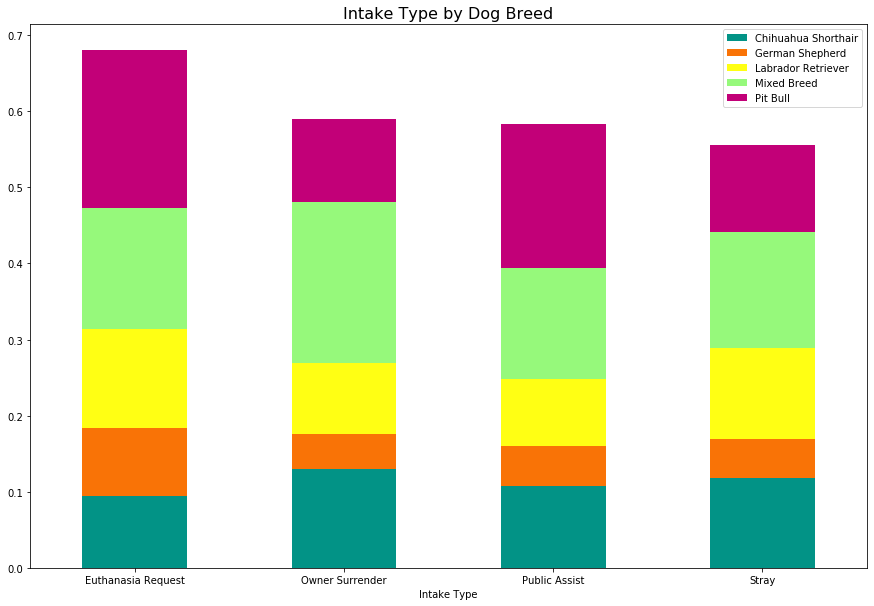

In [25]:
## Intake Type
# Stray                 33231
# Owner Surrender        6896
# Public Assist          3691
# Euthanasia Request      169
# Name: Intake Type, dtype: int64

dog_combined_nodup['Dog Breed'] = dog_combined_nodup['Breed'].apply(parse_breed)
dog_stray = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Stray'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
# dog_stray = dog_stray.iloc[0:i]
# dog_stray_r = dog_stray.sum()
# dog_stray_total
dog_stray

dog_sur = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Owner Surrender'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_sur = dog_sur.iloc[0:i]
dog_sur

dog_pub = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Public Assist'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_pub = dog_pub.iloc[0:i]
dog_pub

dog_euth = dog_combined_nodup.loc[dog_combined_nodup['Intake Type'] == 'Euthanasia Request'].groupby(['Intake Type'])['Dog Breed'].value_counts(1).head(i)
dog_euth = dog_euth.iloc[0:i]
dog_euth

intake_type = dog_stray.append(dog_sur).append(dog_pub).append(dog_euth).unstack()
intake_type

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

intake_type.plot.bar(stacked=True, ax=ax, color=color);
plt.xticks(rotation=0)
ax.set_title('Intake Type by Dog Breed', fontsize=16)

# hide the y axis lable
y_axis = ax.yaxis
y_axis.label.set_visible(False)

ax.legend(loc='upper right')
plt.savefig("Images/Intake_Type_by_Dog_Breed.png")
plt.show()



In [ ]:
# compare with amy's total animal intake

In [7]:
df_combined_nodup


,Unnamed: 0,Animal ID,Name,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,...,Intake Age in Months,DateTime Outcome,Outcome Type,Outcome Subtype,Age upon Outcome,Outcome Month,Outcome Year,Date Intake,Date Outcome,Days in Center
0,20,A803048,133 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,2 weeks,Domestic Shorthair,...,0,08/26/2019 07:47:00 PM,Transfer,Partner,2 weeks,8,2019,2019-08-26,2019-08-26,0
1,21,A803049,200 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,1 weeks,Domestic Shorthair,...,0,08/26/2019 07:48:00 PM,Transfer,Partner,1 weeks,8,2019,2019-08-26,2019-08-26,0
2,22,A803050,192 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,1 weeks,Domestic Shorthair,...,0,08/26/2019 07:47:00 PM,Transfer,Partner,1 weeks,8,2019,2019-08-26,2019-08-26,0
3,23,A803046,209 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,1 weeks,Domestic Shorthair,...,0,08/26/2019 07:45:00 PM,Transfer,Partner,1 weeks,8,2019,2019-08-26,2019-08-26,0
4,24,A803047,165 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,1 weeks,Domestic Shorthair,...,0,08/26/2019 07:47:00 PM,Transfer,Partner,1 weeks,8,2019,2019-08-26,2019-08-26,0
5,25,A803045,197 Grams,08/26/2019 04:04:00 PM,2828 Farm To Market 973 South in Austin (TX),Stray,Normal,Cat,1 weeks,Domestic Shorthair,...,0,08/26/2019 07:46:00 PM,Transfer,Partner,1 weeks,8,2019,2019-08-26,2019-08-26,0
6,26,A803037,Maeby,08/26/2019 02:37:00 PM,Beard Avenue And Manchaca in Austin (TX),Stray,Normal,Dog,7 years,Australian Shepherd,...,84,08/27/2019 03:44:00 PM,Return to Owner,NaN,7 years,8,2019,2019-08-26,2019-08-27,1
7,27,A803029,NaN,08/26/2019 01:12:00 PM,615 West Elray in Austin (TX),Stray,Normal,Cat,3 weeks,Domestic Shorthair,...,0,08/26/2019 02:09:00 PM,Transfer,Partner,3 weeks,8,2019,2019-08-26,2019-08-26,0
8,28,A803023,NaN,08/26/2019 01:12:00 PM,615 West Elray in Austin (TX),Stray,Normal,Cat,3 weeks,Domestic Shorthair,...,0,08/26/2019 02:08:00 PM,Transfer,Partner,3 weeks,8,2019,2019-08-26,2019-08-26,0
9,29,A803024,NaN,08/26/2019 01:12:00 PM,615 West Elray in Austin (TX),Stray,Normal,Cat,3 weeks,Siamese,...,0,08/26/2019 02:09:00 PM,Transfer,Partner,3 weeks,8,2019,2019-08-26,2019-08-26,0


In [13]:
df_adoptions = df_combined_nodup.loc[(df_combined_nodup['Outcome Type'] == 'Adoption') & df_combined_nodup['Animal Type'].isin(['Dog'])]
df_adoptions

,Unnamed: 0,Animal ID,Name,DateTime Intake,Found Location,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,...,Intake Age in Months,DateTime Outcome,Outcome Type,Outcome Subtype,Age upon Outcome,Outcome Month,Outcome Year,Date Intake,Date Outcome,Days in Center
27,87,A802963,Coco,08/25/2019 02:03:00 PM,Austin (TX),Owner Surrender,Normal,Dog,8 months,Bichon Frise Mix,...,8,08/27/2019 04:32:00 PM,Adoption,NaN,9 months,8,2019,2019-08-25,2019-08-27,2
42,160,A802847,NaN,08/23/2019 04:22:00 PM,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,1 year,Chihuahua Shorthair,...,12,08/27/2019 04:19:00 PM,Adoption,NaN,1 year,8,2019,2019-08-23,2019-08-27,4
49,171,A802824,NaN,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,5 months,Border Collie Mix,...,5,08/27/2019 07:05:00 PM,Adoption,NaN,5 months,8,2019,2019-08-23,2019-08-27,4
50,172,A802822,Remy,08/23/2019 11:31:00 AM,3207 Whitepine Drive in Austin (TX),Stray,Normal,Dog,4 months,Standard Poodle/Labrador Retriever,...,4,08/27/2019 07:26:00 PM,Adoption,NaN,4 months,8,2019,2019-08-23,2019-08-27,4
55,183,A802815,NaN,08/23/2019 09:01:00 AM,2600 West Braker Lane in Austin (TX),Stray,Normal,Dog,3 months,Labrador Retriever,...,3,08/27/2019 04:57:00 PM,Adoption,NaN,3 months,8,2019,2019-08-23,2019-08-27,4
60,200,A802797,Ella,08/22/2019 06:40:00 PM,Brushy Creek Road And Highway 193 Toll Frontag...,Stray,Normal,Dog,2 months,Mastiff,...,2,08/26/2019 04:17:00 PM,Adoption,NaN,2 months,8,2019,2019-08-22,2019-08-26,4
68,214,A802776,Buster,08/22/2019 03:18:00 PM,Austin (TX),Owner Surrender,Normal,Dog,7 years,Miniature Poodle,...,84,08/23/2019 12:56:00 PM,Adoption,NaN,7 years,8,2019,2019-08-22,2019-08-23,1
69,215,A802778,Angel,08/22/2019 03:18:00 PM,Austin (TX),Owner Surrender,Normal,Dog,7 years,Chihuahua Longhair,...,84,08/23/2019 12:57:00 PM,Adoption,NaN,7 years,8,2019,2019-08-22,2019-08-23,1
70,216,A802765,Chance,08/22/2019 01:57:00 PM,Austin (TX),Owner Surrender,Normal,Dog,4 months,Rat Terrier Mix,...,4,08/24/2019 03:54:00 PM,Adoption,NaN,4 months,8,2019,2019-08-22,2019-08-24,2
71,217,A802764,NaN,08/22/2019 01:48:00 PM,Reseach And Mcneil in Austin (TX),Stray,Normal,Dog,4 months,Miniature Schnauzer Mix,...,4,08/26/2019 04:34:00 PM,Adoption,NaN,4 months,8,2019,2019-08-22,2019-08-26,4


In [22]:
df_dupes = aacdata.find_duplicate_animals(df_intake)
df_dupes_value = df_dupes.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [24]:
# Austin is a no kill shelter, why are there so many euthanasia requests
# intake health vs outcome for euthenasia
# pie chart for dog outcomes
# of the "normal" what is the breed breakdown

df_combined_deduped['Outcome Type'].value_counts()
df_combined_deduped[df_combined_deduped['Outcome Type']  == 'Euthanasia']['Intake Condition'].value_counts()

Normal     3555
Injured    1712
Sick       1659
Nursing      76
Aged         69
Other        23
Feral         5
Name: Intake Condition, dtype: int64